In [1]:
import gco.pygco as pygco
import matplotlib.pyplot as plt
import numpy as np
import cv2

/opt/anaconda3/envs/nus/lib/python3.9/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


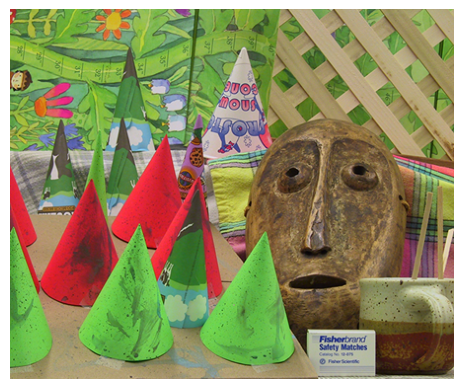

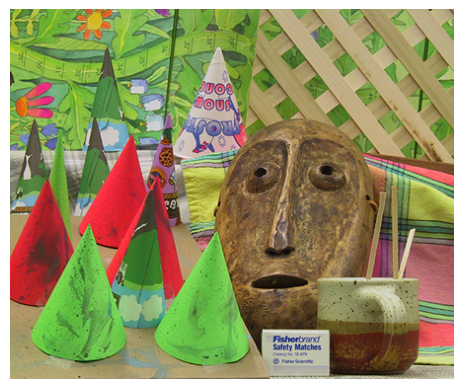

In [2]:
img1 = cv2.imread('part2_imags/image1.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show()

img2 = cv2.imread('part2_imags/image2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')
plt.show()

In [11]:
def dist(patch1, patch2):
    return np.sum(np.abs(patch1 - patch2) ** 2)/3/255

h, w = img1.shape[:2]
number_D = 50
patch_size = 2

# Data term:
data_term = np.zeros((h, w, number_D))

for y in range(0, h-patch_size+1, patch_size):
    for x in range(0, w-patch_size+1, patch_size):
        for d in range(number_D):
            c1 = img1[y:y+patch_size, x:x+patch_size]
            if x - d > 0: 
                c2 = img2[y:y+patch_size, x-d:x-d+patch_size] 
            elif x - d <= 0:
                c2 = img2[y:y+patch_size, 0:patch_size]
            data_term[y+patch_size//2, x+patch_size//2, d] = dist(c1, c2)

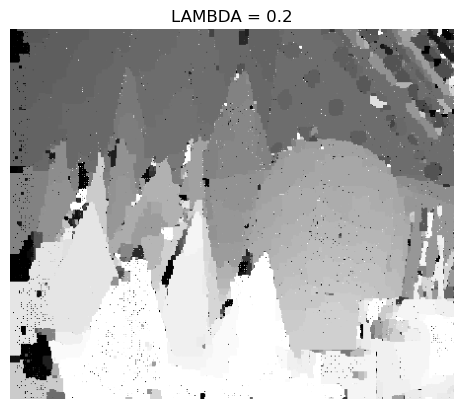

In [14]:
# Prior term:
prior_matrix = 1 - np.eye(number_D)

LAMBDA = 0.2
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_matrix, n_iter=-1, algorithm= 'swap')
labels = labels.reshape(h, w)

plt.imshow(labels, cmap='gray')
plt.title(f'LAMBDA = {LAMBDA}')
plt.axis('off')
plt.show()

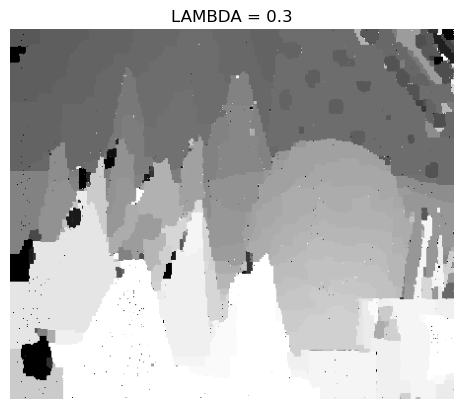

In [15]:
# Prior term:
prior_matrix = 1 - np.eye(number_D)

LAMBDA = 0.3
labels = pygco.cut_grid_graph_simple(data_term, LAMBDA * prior_matrix, n_iter=-1, algorithm= 'swap')
labels = labels.reshape(h, w)

plt.imshow(labels, cmap='gray')
plt.title(f'LAMBDA = {LAMBDA}')
plt.axis('off')
plt.show()

2. Show your best result and provide some discussion if necessary (particularly if the results are not as good as expected).

### The best result: LAMBDA = 0.3(the previous image)
### Discussion
   1. The depth map computed based on patch-wise calculations exhibits lower noise compared to depth maps computed pixel-wise. Smaller patches result in increased noise, approaching the noise levels observed in pixel-wise depth maps. As the patch size increases, the depth map exhibits reduced noise; however, this reduction is accompanied by a loss of finer details.
   2. Similar to pixel-wise depth maps, an increase in the lambda parameter leads to smoother images with reduced noise and fewer details